<a href="https://colab.research.google.com/github/Abhinavk910/Deep-Learning/blob/master/Pytorch/Simple_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
from torch.nn import Sigmoid

from matplotlib import pyplot as plt
%matplotlib inline

In [0]:
dtype = torch.float
device = torch.device('cpu')

In [3]:
X = torch.tensor([[1,0,1],
                  [1,2,5],
                  [1,2,7],
                  [5,2,8]], device = device, dtype = dtype)
X.shape

torch.Size([4, 3])

In [4]:
y = torch.tensor([[1],
                 [0],
                 [1],
                 [0]], device = device, dtype = dtype)
y.shape

torch.Size([4, 1])


<img src = "https://www.learnopencv.com/wp-content/uploads/2017/10/mlp-diagram.jpg"> </p> So in Hidden layer Activation(Non linear) funtion is ReLU and in output Layer it's Sigmoid.

In [0]:
D_in = X.shape[1]
H = 3  # No. of neuron in a hidden layer
D_out = 1
w1 = torch.randn(D_in, H, device = device, dtype = dtype, requires_grad = True)
b1 = torch.randn(X.shape[0], H, device = device, dtype = dtype, requires_grad = True)
w2 = torch.randn(H, D_out, device = device, dtype = dtype, requires_grad = True)
b2 = torch.randn(X.shape[0], D_out, device = device, dtype = dtype, requires_grad = True)

learning_rate = 0.01

In [0]:
sigmoid = Sigmoid()

In [0]:
losses = {}
y_values = {}
for iters in range(20000):


  # forward propogation
  y_pred = sigmoid((X.mm(w1)+b1).clamp(min=0).mm(w2)+b2)
  y_values[iters] = y_pred

  #loss
  y_loss = (y_pred - y).pow(2).sum()
  losses[iters] = y_loss.item()
  
  # backward propogation
  y_loss.backward()
  
  # update grad
  with torch.no_grad():
    w1 -= learning_rate * w1.grad
    b1 -= learning_rate * b1.grad
    w2 -= learning_rate * w2.grad
    b2 -= learning_rate * b2.grad

    w1.grad.zero_()
    b1.grad.zero_()
    w2.grad.zero_()
    b2.grad.zero_()


Text(0, 0.5, 'Loss')

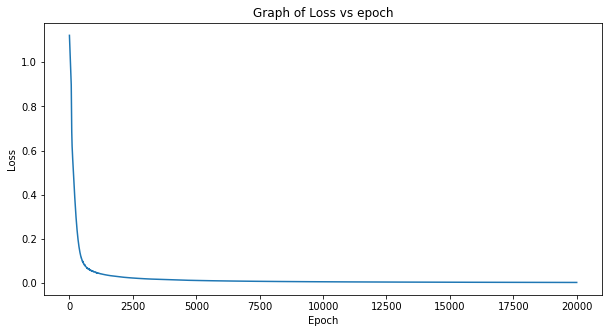

In [8]:
plt.figure(figsize=(10,5))
plt.plot(losses.keys(), losses.values())
plt.title('Graph of Loss vs epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')

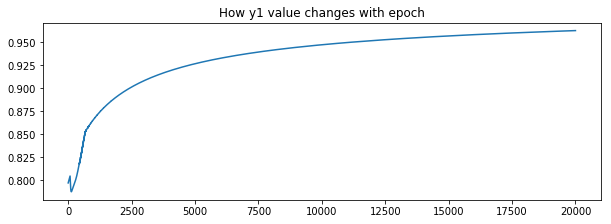

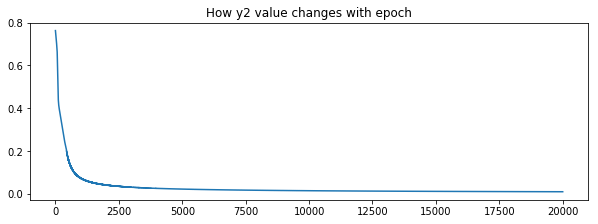

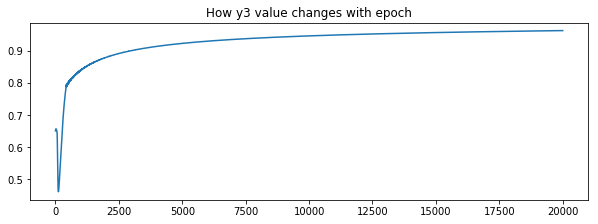

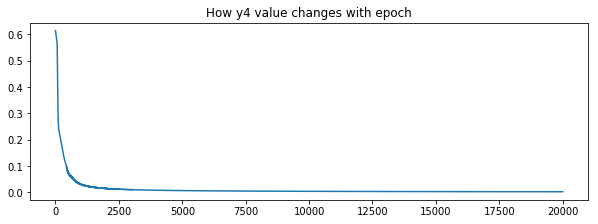

In [9]:
for i in range(1,5):
    plt.figure(figsize=(10,15))
    plt.subplot(4,1,i)
    plt.plot(y_values.keys(),[j[i-1] for _, j in y_values.items()])
    plt.title('How y'+str(i)+' value changes with epoch')
    plt.show()

In [10]:
y_pred

tensor([[0.9630],
        [0.0097],
        [0.9624],
        [0.0029]], grad_fn=<SigmoidBackward>)